# 一、神经元是什么

人工神经网络里的神经元是什么，有什么用，只有弄清楚这个问题，你才知道你在哪里。在做什么。要往哪走。

首先看一下神经元的结构，看下图

![](./data/netuit.jpg)

我们先忽略激活函数不管：
- 输入： $X_{1},X_{2},\cdots ,X_{n}$  $\space\space\space\space$ (1.1)
- 输出：$y$                $\space\space\space\space$ (1.2)
- 输入和输出的关系（函数）：
 
 $$
  y = (X_{1}\times W_{1} +X_{2}\times W_{2} + \cdots +X_{n}\times W_{n}) + 
  b \space\space\space\space（1.3）$$
 
其中，$W_{i}$,$i=1$,$n$为权重（weight）,待会就知道权重为何物
    
 
 因为我们的数据都是离散的，为了看的更清楚，我们换个表达式把数据以向量的形式表示出来：
 - 改写输入：
     $$
         X=[X_{1},X_{2},\cdots,X_{n}]^T  ，X看成n维的向量 \space\space\space\space  (1.4)
         $$ 
      
 - 改写权重：
$$
W =\begin{bmatrix}W_{1} & W_{2}&\cdots &W_{n}\end{bmatrix}，W看成是一行n列的矩阵  \space\space\space\space(1.5)
$$
 - 改写y:
$$
y = \begin{bmatrix}W_{1} & W_{2}&\cdots &W_{n}\end{bmatrix} \cdot  \begin{bmatrix}X_{1}\\X_{2}\\\vdots\\X_{n}\end{bmatrix} + b 
\space\space\space\space(1.6) $$,这不就是线性回归模型吗？可以看到$W$就是斜率啊

现在回答刚才的问题：
- 一个神经元是什么：参照式（1.6），从函数图像角度看，这就是一条直线。
- 一个神经元有什么作用：要说明用途就要给出一个应用场景：分类。一个神经元就是一条直线，此时它就是个分类器。所以在线性场景下，
单个神经元能达到分类的作用，它总能学习到一条合适的直线，将两类元素区分出来。看图说话 http://t.cn/RBCoWof
如下图：

![bp2](./data/BP2.png)

对上图简要说明：
我们需要对神经元的输出做判定，那么久需要判定规则，通过判定规则后我们才能拿到我们想要的结果，这个规则是：

1、假设，0代表红点，1代表蓝点（这些数据都是事先标定好的，在监督学习下，神经元会知道点是什么颜色并以这个已知结果作为标杆进行学习）
2、当神经元输出小于等于0时，最终结果输出为0，这是个红点
3、当神经元输出大于1时，最终结果输出为1，这是个蓝点。

上面的规则有点激活函数的味道（这里只是线性场景，虽然不适合，但是简单期间，使用了单位跃阶函数来描述激活函数的功能）当x<=0时，y=0,当x>0时，y=1）
单位跃阶函数：
![bp02](./data/bp02.jpg)
此时神经元的长相：
![bp03](./data/bp03.jpg)

# 二、激活函数是什么，有什么用

从上面的例子，其实已经说明了激活函数的作用（线性模型的表达能力不够，引入激活函数是为了添加非线性因素），但是我们通常面临的问题，不是简单的线性问题，不能用单位跃阶函数作为激活函数，原因是
跃阶函数在x=0时不连续，即不可导，在非0处导数为0，（说人话）就是它具备输出限定在$[0-1]$,但是它不具备丝滑的特性，这个特性很重要。并且在非0处导数为0，
也就是硬饱和，压根儿就没有梯度可言，梯度也很重要，梯度意味着在神经元传播间是由反应的，而不是“死了的”。

 那激活函数需要具备什么特性呢：
- 非线性：即导数不是常熟，不然就退化成直线，对于一些画一条直线仍然无法分开的问题，非线性可以把直线掰弯，自从掰弯，自从变弯以后就保罗万象了。
- 几乎处处可导： 也就是具备“丝滑的特性”,数学上处处可导为后面讲到的BP提供了核心条件
- 输出范围有限：一般是限定在[0,1]有限的输出范围使得神经元对于一些比较大的输入也会比较稳定。
- 非饱和性：饱和就是指，当输入比较大的时候，几乎没变化了，那么会导致梯度消失！什么是梯度消失：就是输出慢慢的没有变化了。梯度消失带来的负面影响就是限制了神经网络表达能力，词穷的感觉你有么。sigmod,tanh函数都是软饱和的，跃阶函数是硬饱和的。软饱和是指输入趋于无穷大的时候输出无限接近上限，硬是指像跃阶函数那样，输入非0输出就已经始终都是上限值。
如果激活函数是饱和的，带来的缺陷就是系统迭代更新变慢，系统收敛就慢，当然这是可以有办法弥补的，一种方法就是使用交叉熵函数作为损失函数，Relu是非饱和的，亲测效果挺不错
- 单调性：即导数符号不变，导数要么一直大于0，要么一直小于0，不要上窜下跳。导数符号不变，让神经网络训练容易收敛。

- 更多参考[04-激活函数](04-激活函数.ipynb)

这里我们将用到的激活函数：
Sigmod函数：$y = \frac{1}{1+e^{-x}}   \space\space\space\space  (2.1)$    

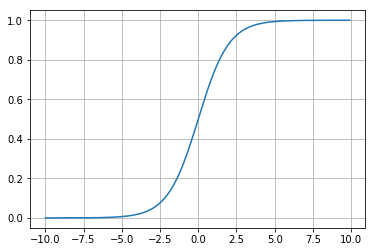

In [38]:

%matplotlib inline
import numpy as np
def sigmoid(x):
    return 1/(1+np.exp(-x))
import matplotlib.pyplot as plt
x = np.arange(-10,10,0.1)
y = [sigmoid(i) for i in x]
plt.figure()
plt.plot(x,y)
plt.grid(True)
plt.show()

对Sigmod函数求导（后面会用到）：
首先要了解复合函数的求导：
- 法则1：$[u(x) \pm v(x)] = u(x) \pm v(x)  \space\space\space\space  (2.2)$             
- 法则2：$[u(x)  \ast v(x)] = u^{'}(x)  \ast v(x) +u(x)  \ast v^{'}(x)\space\space\space\space  (2.3)$
- 法则3：$\frac{u}{v}^{'} = \frac{u^{'}v-uv^{'}}{v^{2}}\space\space\space\space  (2.4)$ 

开始对Sigmoid求导：

$$\begin{aligned}
y =& \left(\frac{1}{1+\space e^{-x}}^{'}\right)\\
=&\left(\frac{u}{v}^{'}\right)  \space\space\space\space  (设u=1,v = 1+e^{-x})\\
=&\frac{u^{'}v-uv^{'}}{v^{2}}\\
=&\frac{1^{'} \ast (e^{-x} \space + \space 1)\space-1 \ast (e^{-x}\space + \space 1)^{'}}{(e^{-x} \space + \space 1)^{2}}\\
=&\frac{e^{-x}}{(e^{-x} \space + \space 1)^{2}}\\
=&\frac{1}{(e^{-x} \space + \space 1)} \ast \frac{e^{-x}\space+\space1-\space 1}{(e^{-x} \space + \space 1)}\\
=&\frac{1}{(e^{-x} \space + \space 1)} \ast \left(1- \frac{1}{(e^{-x} \space + \space 1)}\right)\\
=&y \ast (1-y)\end{aligned}    \space \space \space \space (2.5)$$
 

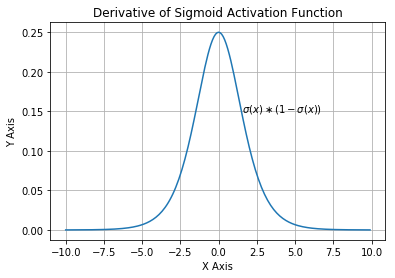

In [39]:
#导数图像为：
%matplotlib inline
import numpy as np
def gety(x):
    return np.exp(-x)/np.power((1+np.exp(-x)),2)
import matplotlib.pyplot as plt
x = np.arange(-10,10,0.1)
y = [gety(i) for i in x]
plt.figure()
plt.plot(x,y)
plt.ylabel('Y Axis')
plt.xlabel('X Axis')
plt.title("Derivative of Sigmoid Activation Function")
plt.text(1.5,0.15,r'$\sigma(x) \ast (1-\sigma(x))$')
plt.grid(True)
plt.show()

# 三、BP（Back Progagation）算法

### 1.神经元的结构

经过上面的介绍，我们知道单个神经元只能处理线性可分情况，唯有多个神经元组成的网络才能处理更复杂的问题。神经网络是一种分层结构，一般
由输入层、隐藏层，输出层组成，所以神经网络至少有3层，隐藏层多于1，总层数大于3的就是我们所说的深度学习。
- 输入层：就是接收原始数据，然后往隐藏层送
- 输出层：神经网络的决策输出
- 隐藏层：该层是神经网络的关键，相当于对数据做一次特征提取，隐藏层的意义是把前一层的向量变成新的向量，就是坐标变换通过$ \alpha(W.\overrightarrow{x}+b)$把数据做平移、旋转、伸缩、扭曲 [参考02-why-Deep](02-why-Deep.ipynb)，这样让数据变得线性可分。
可以说：神经网络换着坐标空间玩数据，根据需要，可降维，可升维，可大，可小，可圆，可扁，就是这么“无敌”
这个可以自己玩玩，直观的感受一下：[传送门](https://cs.stanford.edu/people/karpathy/convnetjs//demo/classify2d.html)

### 2.正向传播过程
看图，这是一个典型的三层神经网络结构，第一层是输入层，第二层是隐藏层，第三层是输出层。PS:不同的应用场景，神经网络的结构要有针对性的设计，这里仅仅是为了推导算法和计算方便才采用这个简单的结构
![0404](./data/04-04.jpg)

我们以战士打靶，目标是训练战士能命中靶心成为神枪手作为场景：
那么我们手里有这样一些数据：一堆枪摆放的位置(x,y)，以及射击结果，命中靶心和不命中靶心。
- 我们的目标是：训练出一个神经网络模型，输入一个点的坐标（射击姿势），它就告诉你这个点是什么结果（是否命中）。-
- 我们的方法是：训练一个能根据误差不断自我调整的模型，训练模型的步骤是：

 - 正向传播：把点的坐标数据输入神经网络，然后开始一层一层的传播下去，直到输出层输出结果。
 - 反向传播(BP)：就好比战士去靶场打靶，枪的摆放位置（输入），和靶心（期望的输出）是已知。战士（神经网络）一开始的时候是这样做的，
 随便开一枪$（w，b参数初始化称随机值,这个场景中我们把w,b当做影响射击的因素的估计，反向传播过程也就是不断
 的在更新w,b，以达到误差最小）$，观察结果（这时候相当于进行了一次正向传播）。然后发现，偏离靶心左边，应该往右点儿打。所以战士开始
 根据偏离靶心的距离（误差，也称损失）调整了射击方向往右一点（这时，完成了一次反向传播）当完成了一次正反向传播，也就完成了一次神经
 网络的训练迭代，反复调整射击角度（反复迭代），误差越来越小，战士打得越来越准，神枪手模型也就诞生了

### 3.BP算法推导和计算

- 参数初始化：
    
    - 输入：$i_{1} = 0.1,i_{2} = 0.2$
    - 输出：$O_{1} = 0.01,O_{2} = 0.99$ 相当于标定了
    - 权重：$w_{1} = 0.1,w_{2} = 0.2, w_{3} = 0.3, w_{4} = 0.4\\
          w_{5} = 0.5,w_{6} = 0.6,w_{7} = 0.7,w_{8} = 0.8$
    - 扁置：$b_{1} = 0.55,b_{2} = 0.56,b_{3} = 0.66,b_{4} = 0.67$
          
- 正向传播：
    - 计算隐层神经元$h_{1}$输入加权和：
        $$\begin{aligned}
        in_{h_{1}}=&w_{1} \ast i_{1} + w_{2} \ast i_{2} + 1 \ast b_{1}\space\space\space\space\space (3.1) \\
            =& 0.1 \ast 0.1 + 0.2 \ast 0.2 + 1 \ast 0.55 \\
            =& 0.6\\
           \end{aligned}
        $$
    - 计算隐层神经网络$h_{1}$的输出，需要通过激活函数Sigmoid：
        $$
        \begin{aligned}
        out_{h_{1}}=& \frac{1}{e^{-in_{h_{1}}}+1}      \space\space\space\space\space (3.2)\\
                    =&\frac{1}{e^{0.6}+1} \\
                    =&0.6456563062\end{aligned}
        $$
    - 同理，计算出$h_{2}$的输出：
         $$
        out_{h_{2}}= 0.6592603884
         $$
- 隐层-->输出层：
    - 计算输出层神经元$O_{1}$的输入加权和：
        $$
        \begin{aligned}
        in_{O1}=& w_{5} \ast Out_{h_{1}} + w_{6} \ast Out_{h_{2}} + 1 \ast b_{3} \space\space\space\space\space (3.3)\\
                        =&0.5 \ast 0.6456563062 + 0.6 \ast 0.6592603884 \\
                        =& 1.3783843861\end{aligned}
        $$
    - 计算隐层$O_{1}$的输出：
        $$
        \begin{aligned}
        out_{O1}= &\frac{1}{e^{-in_{O_{1}}}+1}      \space\space\space\space\space (3.4)\\
                        =&\frac{1}{e^{1.3783843861}+1} \\
                        =&0.7987314002
        \end{aligned}
        $$
    - 同理，计算隐层神经元$O_{2}$的输出：
        $$
        out_{O_{2}}= 0.8374488853
        $$
        
    正向传播结束，我们看看输出层的结果[0.7987314002,0.8374488853],但是我们希望它能输出[0.01,0.99],所以误差相差很大，这个时候我们就需要利用反向传播更新权值w，然后重新计算输出：
- 反向传播：
    - 1.计算输出误差：
    $$
       \begin{aligned}
       E_{total} =& \sum_{i=1}^{\space2}E_{out_{O_{\space i}}} \space\space\space\space\space (3.5)\\
       =&E_{out_{O_{\space 1}}} + E_{out_{O_{\space2}}}\\
       =&\frac{1}{2}\left(O_{1}-out_{O_{\space 1}} \right)^2+\frac{1}{2}\left(O_{2}-out_{O_{\space 2}} \right)^2\\
       =&\frac{1}{2}\left(0.01-0.7987314002 \right)^2+\frac{1}{2}\left(0.99-0.8374488853 \right)^2\\
       =&0.0116359213+0.3110486109\\
       =&0.3226845322\\
       \\
       &\textrm{其中}{ E_{out_{O_{\space 1}}}= 0.0116359213 ,E_{out_{O_{\space 2}}}= 0.3110486109}
       \end{aligned}
       $$
       
          注意：这里用平方和损失作为误差的计算，是因为它简单，实际上用的时候效果不咋滴，如果激活函数是饱和的，带来的缺陷就是系统迭代更新更慢，系统收敛就慢，当然这可以通过交叉熵函数作为损失函数来弥补，交叉熵作为代价函数在计算误差对输入的梯度时，抵消了激活函数的导数项，神奇的避免了因为激活函数的“饱和性”给系统带来的负面影响. [传送门](05-BP神经网络-二次代价到交叉熵代价.ipynb)

            交叉熵：

        $$
        \begin{aligned}
         E_{total} = &\frac{1}{m}\sum_{i=1}^{m}\left(O\cdot log(out_{O})+(1-O)\cdot log(1- out_{O})\right)\\
        \frac{\partial out_{O}}{\partial out_{in_{O}}} =& out_{O}(1-out_{O})
        \end{aligned}$$

            对输出的偏导数：
         $$
            \begin{aligned}
                \frac{\partial E_{total}}{\partial out_{O}} = &\frac{1}{m}\sum_{i=1}^{m}\left(\frac{O}{out_{O}} - \frac{1-O}{1- Out_{O}}\right)\frac{\partial out_{O}}{\partial out_{in_{O}}}\\
            =&\frac{1}{m}\sum_{i=1}^{m}\left(\frac{O}{out_{O}} - \frac{1-O}{1-Out_{O}}\right)out_{O}(1-out_{O}) \\
            =& \frac{1}{m}\sum_{i=1}^{m}\left(O-out_{O}\right)
            \end{aligned}
         $$
      
    - 2.隐层-->输出层的权值及偏置b的更新：
      
    - 先给出链式求导法则：
              
               假设y是u的函数，而u是x的函数：y = f(u),u = g(x)
               
               对应的复合函数就是：y = f(g(x))
               
               那么y对x的导数则有： 
         $$            
               \frac{dy}{dx} = \frac{dy}{du} \cdot \frac{du}{dx}
         $$ 
    - 以更新w5为例：
            as we know ,全值w的大小能直接影响输出，w不合适那么会使得输出误差。要想知道某一个w值对误差影响的程度，可以用误差对该w的变化率来表达，如果w的一点点变动，就会导致误差增大很多，说明这个w对误差影响的程度就更大，也就是说，误差对该w的变化率越高。而误差对w的变化率就是误差对w的偏导。看下图，总误差的大小首先受输出神经元O1的输出影响，继续反推，O1的输出受它自己的输入影响，而输入又收到w5的影响。这就是链式反应，从结果反推根因。
 ![04-05.jpg](./data/04-05.jpg)
       那么根据链式法则则有：
         $$
                \frac{\partial E_{total}}{\partial W_{5}} = \frac{\partial E_{total}}{\partial out_{O1}}\cdot \frac{\partial out_{O1}}{\partial in_{O1}}\cdot \frac{\partial in_{O1}}{\partial W_{5}}           \space\space\space\space (3.6)
         $$


     现在开始逐个计算：
$$
\begin{aligned}
\because  E_{total} =& \sum_{i=1}^{\space2}E_{out_{O_{\space i}}} \space\space\space\space\space (3.7)\\
=&E_{out_{O_{\space 1}}} + E_{out_{O_{\space2}}}\\
=&\frac{1}{2}\left(O_{1}-out_{O_{\space 1}} \right)^2+\frac{1}{2}\left(O_{2}-out_{O_{\space 2}} \right)^2\\
\therefore\frac{\partial E_{total}}{\partial out_{O1}} = &\frac{\frac{1}{2}\left(O_{1}-out_{O_{\space 1}} \right)^2+\frac{1}{2}\left(O_{2}-out_{O_{\space 2}} \right)^2}{\partial out_{O1}}  \space\space\space\space (2.7) \\
=&2\cdot\frac{1}{2}(O_{1} - out_{O1})^{2-1}\cdot (0-1) +0\\
=&-(O_{1} - out_{O1}) \space\space\space\space (3.8)\\
=&-(0.01-0.7987314002)\\
=&0.7887314002
\end{aligned}
$$

 $$
        \begin{aligned}
        \because out_{O1}= &\frac{1}{e^{-in_{O_{1}}}+1}      \space\space\space\space\space (3.9)\\
        \therefore \frac{\partial out_{O1}}{\partial in_{O1}}= &\frac{\partial \frac{1}{e^{\space -in_{\space O_{1}}\space}\space+\space1}}{\partial in_{O1}}  \\  
        =&out_{O1}(1-out_{O1}) \space\space\space\space\space (3.10)\\
        =&0.7987314002 \cdot(1-0.7987314002)\\
        =&0.1607595505
        \end{aligned}
$$

 $$
        \begin{aligned}
        \because   in_{O1}=& w_{5} \ast Out_{h_{1}} + w_{6} \ast Out_{h_{2}} + 1 \ast b_{3} \space\space\space\space\space (3.11)\\
        \therefore  \frac{\partial in_{O1}}{\partial W_{5}} \\= &\frac{\partial {w_{5} \ast Out_{h_{1}} + w_{6} \ast Out_{h_{2}} + 1 \ast b_{3}}}{\partial w_{5}}  \space\space\space\space\space (3.12)\\
         =&1\cdot w_{5}^{1-1} \cdot out_{h1} + 0 + 0\\
         =&out_{h1}\\
         =&0.6456563062
        \end{aligned}
$$

 $$
        \begin{aligned}
        \therefore \frac{\partial E_{total}}{\partial W_{5}} =& \frac{\partial E_{total}}{\partial out_{O1}}\cdot \frac{\partial out_{O1}}{\partial in_{O1}}\cdot \frac{\partial in_{O1}}{\partial W_{5}}  \space\space\space\space\space (3.13)\\
        =&0.7887314002\cdot 0.1607595505 \cdot 0.6456563062\\
        =&0.0818667051
        \end{aligned}
$$

    对w求偏导公式可以归纳为：
 
$$
        \begin{aligned}
        \therefore \frac{\partial E_{total}}{\partial W_{5}} =& \frac{\partial E_{total}}{\partial out_{O1}}\cdot \frac{\partial out_{O1}}{\partial in_{O1}}\cdot \frac{\partial in_{O1}}{\partial W_{5}}  \space\space\space\space\space (3.13)\\
        =&(-(O_{1} - out_{O1})) \cdot out_{O1}\cdot(1-out_{O1}) \cdot out_{h1}\\
        =&\sigma_{O_{1}}\cdot out_{h1}\\
        \textrm{其中,}\sigma_{O_{1}}=& (-(O_{1} - out_{O1})) \cdot out_{O1}\cdot(1-out_{O1}) \cdot out_{h1}
        \end{aligned}
$$

   同理，对b求偏导公式可以归纳为：
$$
        \begin{aligned}
        \because   in_{O1}=& w_{5} \ast Out_{h_{1}} + w_{6} \ast Out_{h_{2}} + 1 \ast b_{3} \space\space\space\space\space (3.14)\\
        \therefore \frac{\partial in_{O1}}{\partial  b_{3}}=&\frac{\partial {w_{5} \ast Out_{h_{1}} + w_{6} \ast Out_{h_{2}} + 1 \ast b_{3}}}{\partial  b_{3}}  \space\space\space\space\space (3.15)\\
        =&0+0+b_{3}^{1-1}\\
        =&1
        \end{aligned}
$$

$$
        \begin{aligned}
        \therefore \frac{\partial E_{total}}{\partial  b_{3}} =& \frac{\partial E_{total}}{\partial out_{O1}}\cdot \frac{\partial out_{O1}}{\partial in_{O1}}\cdot \frac{\partial in_{O1}}{\partial  b_{3}}  \space\space\space\space\space (3.16)\\
        =&(-(O_{1} - out_{O1})) \cdot out_{O1}\cdot(1-out_{O1}) \cdot 1\\
        =&\sigma_{O_{1}}\\
        \textrm{其中,}\sigma_{O_{1}}=& (-(O_{1} - out_{O1})) \cdot out_{O1}\cdot(1-out_{O1}) 
        \end{aligned}
$$

更新w5值之前还需要初始化一个学习率，关于学习率，不能过高也不能过低，因为训练神经网络系统的过程，就是通过不断的迭代，找到让系统
输出误差最小的参数的过程。每一次迭代都经过反向传播进行梯度下降。学习率太小，容易陷入局部最优。学习率太高，系统可能无法收敛，
会在一个地方上窜下跳。

顺带提一句，神经网络的目标是通过更新w，b的值来实现误差最小，因此顺着w,b的梯度的反方向，下降的最快。

现在开始更新w5的值，就设定学习率为0.5吧：
$$
\begin{aligned}
w_{5}^{+} =& w_{5} - \alpha \cdot \frac{\partial E_{total}}{\partial w_{5}} \space\space\space\space (3.17)\\
=&0.5 - 0.5 \cdot 0.0818667051 \\
=&0.45906664745
\end{aligned}
$$

归纳输出层w更新的公式：

$$
\begin{aligned}
w_{O}^{+} =&w_{O} - \alpha \cdot(-(O - out_{O})) \cdot out_{O}\cdot(1-out_{O}) \cdot out_{h} \space\space\space\space (3.18)\\
=&w_{O} + \alpha \cdot(O - out_{O})\cdot out_{O}\cdot(1-out_{O}) \cdot out_{h}
\end{aligned}
$$

同理可以计算$w_{6},w_{7},w_{8}$的更新值。
        
同理更新偏置b：
$$
\begin{aligned}
b^{+} =& b _{O}- \alpha \cdot \frac{\partial E_{total}}{\partial b_{O}} \space\space\space\space (3.19)\\
=&b_{O}- \alpha \cdot(-(O_{1} - out_{O1})) \cdot out_{O1}\cdot(1-out_{O1}) \\
=&b_{O}+ \alpha \cdot(O_{1} - out_{O1}) \cdot out_{O1}\cdot(1-out_{O1})
\end{aligned}
$$

 - 3.输入层-->隐层的全值及偏置b更新：
    - 3.1以更新w1为例：
        ![04-06.jpg](./data/04-06.jpg)
        从上图中可以看出，我们在求$w_{5}$的更新时，误差反向传递路径为：输出层->隐层，即 $out_{O1}-->in_{O1}-->w_{5}$,总误差只有一条路径能传回来。但是在求$w_{1}$时，误差反向传递路径是：隐藏层-->输入层，但是隐藏层的神经元是有2根线的，所以总误差沿着2个路径回来，也就是说，计算偏导时，要分开计算。
     总误差对$w_{1}$的偏导：
     $$
     \begin{aligned}
     \frac{\partial E_total}{w_{1}} = &\frac{\partial E_total}{\partial Out_{h1}}\cdot\frac{\partial out_{h1}}{\partial in_{h1}}\cdot\frac{\partial in_{h1}}{w_{1}} \space\space\space\space (3.20) \\
     =&(\frac{\partial E_{O1}}{\partial Out_{h1}}+\frac{\partial E_{O2}}{\partial Out_{h1}})\cdot\frac{\partial out_{h1}}{\partial in_{h1}}\cdot\frac{\partial in_{h1}}{w_{1}}
     \end{aligned}
     $$
    - 3.2现在开始计算

参考：https://zhuanlan.zhihu.com/p/38006693